# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
print(cities_count)
# print(cities)

597


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# create setting and desired_keys
setting = {'units':'Imperial','appid':api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

In [5]:
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []

In [6]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')
        

Beginning Data Retrieval
---------------------
Processing City # 1 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=marawi
Processing City # 2 | palasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=palasa
City not found. skipping...
Processing City # 3 | wad madani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=wad+madani
City not found. skipping...
Processing City # 4 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=new+norfolk
Processing City # 5 | buqayq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=buqayq
City not found. skipping...
Processing City # 6 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=puerto+ayora
Proce

Processing City # 56 | sawakin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=sawakin
Processing City # 57 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=cidreira
Processing City # 58 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=esperance
Processing City # 59 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=yar-sale
Processing City # 60 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=ilulissat
Processing City # 61 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=castro
Processing City # 62 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=marc

Processing City # 113 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=hasaki
Processing City # 114 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=biak
Processing City # 115 | point pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=point+pedro
Processing City # 116 | sovetskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=sovetskaya
Processing City # 117 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=severo-kurilsk
Processing City # 118 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=ust-kuyga
Processing City # 119 | savannakhet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a

Processing City # 169 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=huarmey
Processing City # 170 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=port+hardy
Processing City # 171 | sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=sabang
Processing City # 172 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=hithadhoo
Processing City # 173 | san isidro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=san+isidro
Processing City # 174 | roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=roald
Processing City # 175 | dzhusaly
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe

Processing City # 225 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=mahebourg
Processing City # 226 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=port+elizabeth
Processing City # 227 | okha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=okha
Processing City # 228 | haibowan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=haibowan
City not found. skipping...
Processing City # 229 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=bathsheba
Processing City # 230 | kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kiama
Processing City # 231 | cachoeira do sul
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing City # 281 | phillipsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=phillipsburg
Processing City # 282 | gavle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=gavle
Processing City # 283 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=ambon
Processing City # 284 | ust-kamchatsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=ust-kamchatsk
City not found. skipping...
Processing City # 285 | bankura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=bankura
Processing City # 286 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=atar
Processing City # 287 | sungaipenuh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c

Processing City # 336 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kahului
Processing City # 337 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=ahipara
Processing City # 338 | umm lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=umm+lajj
Processing City # 339 | mbaiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=mbaiki
Processing City # 340 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=te+anau
Processing City # 341 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=tessalit
Processing City # 342 | manga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=manga
P

Processing City # 395 | belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=belyy+yar
Processing City # 396 | keningau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=keningau
Processing City # 397 | nago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=nago
Processing City # 398 | oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=oranjemund
Processing City # 399 | calabozo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=calabozo
Processing City # 400 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=honiara
Processing City # 401 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3

Processing City # 453 | sibu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=sibu
Processing City # 454 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=adrar
Processing City # 455 | zalesovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=zalesovo
Processing City # 456 | strelka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=strelka
Processing City # 457 | dubai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=dubai
Processing City # 458 | upington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=upington
Processing City # 459 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=aykhal
Processing 

Processing City # 510 | churapcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=churapcha
Processing City # 511 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=tazovskiy
Processing City # 512 | eirunepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=eirunepe
Processing City # 513 | batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=batagay
Processing City # 514 | siva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=siva
Processing City # 515 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=nishihara
Processing City # 516 | yangcun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q

Processing City # 566 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=nemuro
Processing City # 567 | mokhotlong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=mokhotlong
Processing City # 568 | halifax
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=halifax
Processing City # 569 | chopovychi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=chopovychi
Processing City # 570 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=ngukurr
City not found. skipping...
Processing City # 571 | nidzica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=nidzica
Processing City # 572 | bardiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_df =[]
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()
weather_df.to_csv(output_data_file)

In [16]:
weather_df.count()

City               536
Cloudiness         536
Country            536
Date               536
Humidity           536
Lat                536
Lng                536
Max Temperature    536
Wind Speed         536
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [17]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(weather_df[y])-20,max(weather_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

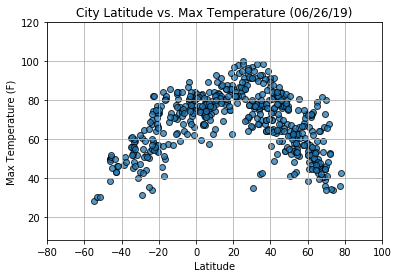

In [18]:
lat_temp = plot_lat(y='Max Temperature',y_label='Max Temperature (F)')
lat_temp

#### Latitude vs. Humidity Plot

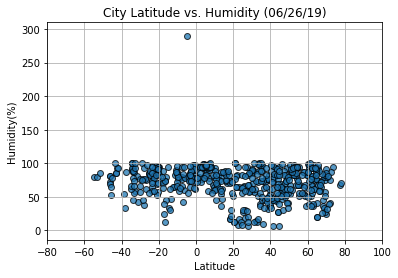

In [19]:
lat_humidity = plot_lat(y='Humidity',y_label='Humidity(%)')
lat_humidity

#### Latitude vs. Cloudiness Plot

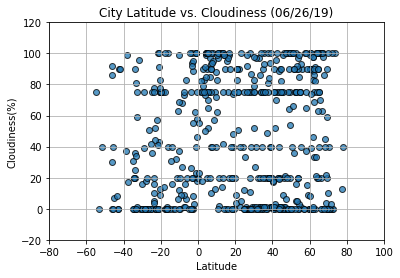

In [20]:
lat_cloud = plot_lat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

#### Latitude vs. Wind Speed Plot

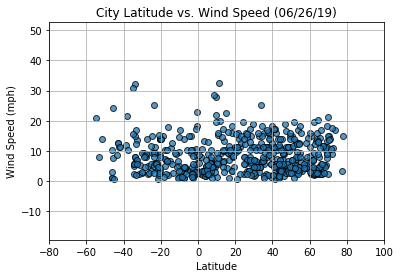

In [21]:
lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind

In [ ]:
Weather Data Analysis

As we approach the equator the temperature increases.
Since data has been collected in summer the temperatures are warmer in northen hemisphire.
There is no relationship between city latitude and wind speed, cloudiness and Humidity.